In [467]:
#from lib import praatUtil
import sys
import numpy as np
import librosa
from pydub import AudioSegment as audioseg
from scipy.signal import get_window
from waveform_analysis.freq_estimation import (freq_from_crossings,
                                               freq_from_fft,
                                               freq_from_autocorr,
                                               freq_from_hps)

from scipy.io import wavfile
import time
import math
import wave
import struct
import soundfile as sf
from soundfile import SoundFile
from matplotlib import pyplot as plt
from pydub import AudioSegment
import logging

In [468]:
import amfm_decompy
import amfm_decompy.pYAAPT as pyaapt
import amfm_decompy.pyQHM as pyqhm
import amfm_decompy.basic_tools as basic
import os.path

In [469]:
TEN_SECONDS = 10 * 1000
THIRTY_SECONDS = 30 * 1000
SAMPLE_RATE = 48000
SAMPLE_RATE2 = 44100
FILE_NAME = "rawData/testRawData.wav"
MP3_FILE_NAME = "rawData/testRawData.mp3"
FILE_NAME_CHILD01 = "rawData/child01.wav"
FILE_NAME_CHILD02 = "rawData/child02.wav"
FILE_NAME_WOMEN = "rawData/female.wav"
FILE_NAME_MEN = "rawData/mono_male_wav.wav"

In [470]:
def wav_test():
    #FILENAME = "rawData/testRawData.wav"
    freq = 440.0
    data_size = 40000
    frate = 1000.0
    amp = 64000.0
    nchannels = 2
    sampwidth = 2
    framerate = int(frate)
    nframes = data_size
    comptype = "NONE"
    compname = "not compressed"
    data = [(math.sin(2 * math.pi * freq * (x / frate)),
        math.cos(2 * math.pi * freq * (x / frate))) for x in range(data_size)]
    try:
        wav_file = wave.open(FILE_NAME, 'w')
        wav_file.setparams(
            (nchannels, sampwidth, framerate, nframes, comptype, compname))
        for values in data:
            for v in values:
                wav_file.writeframes(struct.pack('h', int(v * amp / 2)))
    finally:
        wav_file.close()

In [471]:
def loadFile(fileName):
    sf = SoundFile(fileName)
    signal = sf.read()
    channels = sf.channels
    sample_rate = sf.samplerate
    sf.close()
    return signal, channels, sample_rate

In [472]:
def splitAudio(SpeechFileName):
    wavClipList = []
    wavClipList = audioseg.from_file(SpeechFileName)
    return wavClipList

In [473]:
def fft_frequence_estimate(signal,sample_rate):
    _freq = freq_from_fft(signal, sample_rate)
    return _freq

In [474]:
def crossings_frequence_estimate(signal,sample_rate):
    _freq = freq_from_crossings(signal, sample_rate)
    return _freq

## Utility Functions of Converting Audio Bytes to Array

In [475]:
def ConvertWaveByte2Array(file):
     
    waveFile = wave.open(file, 'r')
    samples = []
 
    # Gets total number of frames
    length = waveFile.getnframes()
     
    # Read them into the frames array
    for i in range(0,length):
        waveData = waveFile.readframes(i)
        data = struct.unpack("%ih"%2, waveData)
         
        # After unpacking, each data array here is actually an array of ints
        # The length of the array depends on the number of channels you have
         
        # Drop to mono channel
        samples.append(int(data[0]))
     
    samples = array(samples)
    return samples

In [476]:
def WavByteToNDArray():
    frames = wavfile.readframes(nsamples)
    ch1 = np.zeros(nsamples)
    ch2 = np.zeros(nsamples)
    int2float = (2**23)-1
    for x in np.arange(int(nsamples)):
        ch1_24bit_sample = frames[x*6:x*6+3]
        ch2_24bit_sample = frames[x*6+3:x*6+6]
        ch1_32bit_sample = bit24_2_32(ch1_24bit_sample)
        ch2_32bit_sample = bit24_2_32(ch2_24bit_sample)
        ch1[x]=struct.unpack('i',ch_32bit_sample)[0]
        ch2[x]=struct.unpack('i',ch_32bit_sample)[0]
        ch1[x]=ch1[x]/int2float
        ch2[x]=ch2[x]/int2float

def bit24_2_32(strbytes):
    if strbytes[2] < '\x80':
       return strbytes+'\x00'
    else:
       return strbytes+'\xff'

In [477]:
def ConvertStereo2Mono(TwoChannelFile,MonoFile):
    monosound = AudioSegment.from_wav(TwoChannelFile)
    monosound = monosound.set_channels(1)
    monosound.export(MonoFile, format="wav")

In [478]:
def wave_run():
    # one second contains 48000 frames, one frame contains 4 bytes
    # so 30 seconds contain 1440000
    #FName = "rawData/testRawData.wav"
    #FName = "rawData/child01.wav"
    wf = wave.open(FILE_NAME,'rb')
    frames = wf.getnframes()
    audioArray = wf.readframes(frames)
    bytes_per_frame = int(len(audioArray)/frames)
    print("Bytes per frame are {}".format(bytes_per_frame))
    print("the length of audioArray is {}".format(len(audioArray)))
    #print("frames type is {}, and shape is {}".format(type(audioArray),audioArray.shape))
    framerate = wf.getframerate()
    seconds = frames/framerate
    
    #print("The total frame is {}, and total seconds are {}".format(frames,seconds))
    
    #calculating one second contains how many frames: we get 48000 frames per second
    #frames_per_second = int(frames/seconds)
    print("One Second contains {} frames".format(framerate))
    __loops =int(frames / framerate)
    print("The __loop has values {}".format(__loops))
    start = 0
    end = 0
    for idx in range(__loops):
        start = idx * framerate
        end = (idx+1) * framerate
    #print("Frames:{}, Sample_Rate:{}, Seconds:{} ".format(frames,sr,seconds))

In [479]:
def appRun():
    #FName = "rawData/testRawData.wav"
    #FName = "rawData/male.wav"
    audioDataList, channels, sample_rate = loadFile(FILE_NAME)
    print("sample rate is {}".format(sample_rate))
    print("channel is : {}".format(channels))
    #print(type())
    _audio_len = len(audioDataList)
    _start = 0
    _end = 0
    total_seconds = int(_audio_len / sample_rate)
    frames_per_30_seconds = sample_rate * 30
    print("Frames every 30 seconds is {}".format(frames_per_30_seconds))
    loop_30 = int(_audio_len / frames_per_30_seconds)
    print("total loop is {}".format(loop_30))
    #print("frames per second is {}".format(total_seconds))
    #loops = int((int(_audio_len/sample_rate))/30)
    #sec_loops = int(_audio_len/SAMPLE_RATE)
    print("_audio_len's length is {}".format(_audio_len))
    
    ###############################################################################
    
    
    for idx in range(total_seconds):
        _start = idx * SAMPLE_RATE
        _end = (idx+1) * SAMPLE_RATE
        #[:,x] : get the x-th column
        #[x,:] : get the x-th row
        # two channels
        signal = (audioDataList[_start:_end])[:,0]
        # one channels
        #signal = (audioDataList[_start:_end])
        #fft_freq = fft_frequence_estimate(signal,SAMPLE_RATE2)
        try:
            yaapt_freq = yaapt_frequence_estimate(signal,SAMPLE_RATE)
            print("The {}-th second, Start:{},   End:{}, Frequence:{}".format(idx, _start,_end,yaapt_freq))
        except Exception as ex:
             logging.info("Caught exception {}".format(ex))
        
    
        #cfreq = crossings_frequence_estimate(signal, sample_rate)
        #print("The {}-th second, Start:{},   End:{}, Frequence:{}".format(idx, _start,_end,cfreq))
        #print("Start:{},   End:{}, Frequence:{}".format(_start,_end,crossings_freq))
         #print("Start:{},   End:{}, idx:{}".format(_start,_end,idx))
    
    
    #first_30_seconds = audioDataList[:THIRTY_SECONDS]
    
    #print("Length of audioDataList is {}".format(loop))
    #freq_fft = fft_frequence_estimate(first)
    #freq_crossing = freq_from_crossings(first_30_seconds[:,0], sample_rate)
    #print("The frequence fft is {}".format(freq_fft))
    #print("The frequence crossing is {}".format(freq_crossing))
    #print(len(first_30_seconds[0:]))

In [480]:
def yaapt_frequence_estimate(signal,sample_rate, F0_Min = 75, F0_Max = 600):
    #sample_rate, wav_data = wavfile.read(FILE_NAME)
    #monofile = "rawData/mono_raw_audio.wav"
    #ConvertStereo2Mono(FILE_NAME,monofile)
    signalObject = basic.SignalObj(signal,sample_rate)
    pitchObj = pyaapt.yaapt(signalObject, f0_min=F0_Min, f0_max=F0_Max)
    #f0_value = pitchObj.samp_values
    #print("male.wav's pitch is {} and length {}".format(f0_value,len(f0_value)))
    return pitchObj.samp_values
    
    

In [481]:
def RunApp_YAAPT():
    audioDataList, channels, sample_rate = loadFile(FILE_NAME)
    print("sample rate is {}".format(sample_rate))
    print("channel is : {}".format(channels))
    #print(type())
    _audio_len = len(audioDataList)
    _start = 0
    _end = 0
    total_seconds = int(_audio_len / sample_rate)
    frames_per_30_seconds = sample_rate * 30
    loops_of_30_secs = int(_audio_len / frames_per_30_seconds)
    plotList = []
    #total_seconds
    for idx in range(loops_of_30_secs):
        _start = idx * SAMPLE_RATE
        _end = (idx+1) * SAMPLE_RATE
        startSec = idx * 30
        endSec = (idx+1) * 30
        #[:,x] : get the x-th column
        #[x,:] : get the x-th row
        # two channels
        signal = (audioDataList[_start:_end])[:,0]
        # one channels
        #signal = (audioDataList[_start:_end])
        #fft_freq = fft_frequence_estimate(signal,SAMPLE_RATE2)
        try:
            yaapt_freq = yaapt_frequence_estimate(signal,SAMPLE_RATE)
            #print("The {}-th to {}-th seconds, Start:{},   End:{}, Max Frequence:{}".format(startSec, endSec, _start,_end,max(yaapt_freq)))
            plotList.append(max(yaapt_freq))
        except Exception as ex:
             logging.info("Caught exception {}".format(ex))
                
    plt.plot(plotList, label='frequences', color='blue')            
    plt.xlabel('number of samples', fontsize=18)
    plt.ylabel('Pitch (Hz)', fontsize=18)
    plt.legend(loc='upper right')
    axes = plt.gca()
    axes.set_xlim([0,100])
    axes.set_ylim([40,400])
    plt.show()
                
    
    

In [482]:
def AnalysisSpeechMain(AudioFile,SampSpanInSecond,F0_Min=75,F0_Max=600):
    def Average(lst): 
        return sum(lst) / len(lst)

    print("Processing F0 Analysis of {}.".format(AudioFile))
    print("Sample Span in Second is {} seconds".format(SampSpanInSecond))
    
    audioDataList, channels, sample_rate = loadFile(AudioFile)
    _audio_len = len(audioDataList)
    total_seconds = int(_audio_len / sample_rate)
    print("sample rate is {}".format(sample_rate))
    print("channel is : {}".format(channels))
    print("Processing Audio is {} long.".format(_audio_len))
    print("Processing Audio is {} seconds.".format(total_seconds))
    ####### Processing Logic #######
    
    _start = 0
    _end = 0
    frames_per_sample_span_in_second = sample_rate * SampSpanInSecond
    loops = int(_audio_len / frames_per_sample_span_in_second)
    print("Parameter: frames_per_sample_span_in_second:{}, loops:{} .".format(frames_per_sample_span_in_second,loops))
    MaxFreqList = []
    DiffFreqList = []
    AvgFreqList = []
    signal = []
    for idx in range(loops):
        _start = idx * frames_per_sample_span_in_second
        _end = (idx+1) * frames_per_sample_span_in_second - 1
        startSec = idx * SampSpanInSecond
        endSec = (idx+1) * SampSpanInSecond
        #[:,x] : get the x-th column
        #[x,:] : get the x-th row
        # two channels
        if channels == 2:
            # Downgrade to mono
            signal = (audioDataList[_start:_end])[:,0]
        else:
            #one channels
            signal = (audioDataList[_start:_end])
        #fft_freq = fft_frequence_estimate(signal,SAMPLE_RATE2)
        try:
            yaapt_freq = yaapt_frequence_estimate(signal,sample_rate,F0_Min=F0_Min,F0_Max=F0_Max)
            _max_freq = max(yaapt_freq)
            _avg_freq = Average(yaapt_freq)
            _diff_freq = _max_freq - _avg_freq
            #print("The {}-th to {}-th seconds, Start:{},   End:{}, Max Frequence:{}, Average Frequency:{}".format(startSec, endSec, _start,_end,max(yaapt_freq), Average(yaapt_freq)))
            print("The {}-th to {}-th seconds".format(startSec, endSec))
            print("Max Freq:{}".format(_max_freq))
            print("Avg Freq:{}".format(_avg_freq))
            print("Diff Freq:{}".format(_diff_freq))
            print("*******************************")
            MaxFreqList.append(_max_freq)
            DiffFreqList.append(_diff_freq)
            AvgFreqList.append(_avg_freq)
        except Exception as ex:
            logging.info("Caught exception {}".format(ex))
            
    print("The average frequency of Max List is {}.".format(Average(MaxFreqList)))
    print("The average frequency of Avg List is {}.".format(Average(AvgFreqList)))
    print("The average frequency of Diff List is {}.".format(Average(DiffFreqList)))
    
    return MaxFreqList, DiffFreqList, AvgFreqList
            
    ####### plot logic ########
    '''
    plt.plot(MaxFreqList, label='frequences', color=plotColor)            
    plt.xlabel('number of samples', fontsize=18)
    plt.ylabel('Pitch (Hz)', fontsize=18)
    plt.legend(loc='upper right')
    axes = plt.gca()
    axes.set_title(AudioFile)
    axes.set_xlim([0,20])
    axes.set_ylim([40,500])
    plt.show()
    '''

In [483]:
def plot_Graph(DataList,xRange,yRange,title,plotColor):
    plt.plot(DataList, label='frequences', color=plotColor)            
    plt.xlabel('number of samples', fontsize=18)
    plt.ylabel('Pitch (Hz)', fontsize=18)
    plt.legend(loc='upper right')
    axes = plt.gca()
    axes.set_title(title)
    axes.set_xlim(xRange)
    axes.set_ylim(yRange)
    plt.show()

In [484]:
def App_Entry():
    '''
    plt.subplot(1, 2, 2)
    data1 = AnalysisSpeechMain(FILE_NAME_CHILD01,1)
    plot_Graph(data1,[0,30],[100,400],"Child01","blue")
    data2 = AnalysisSpeechMain(FILE_NAME_CHILD02,1)
    plot_Graph(data2,[0,30],[100,600],"Child02","green")
    data3 =AnalysisSpeechMain(FILE_NAME_WOMEN,1)
    plot_Graph(data3,[0,30],[100,400],"Women","red")
    data4 =AnalysisSpeechMain(FILE_NAME_MEN,1)
    plot_Graph(data4,[0,20],[20,400],"Man","orange")
    '''
    
    _sample_interval = 5
    start_time = time.time()
    _max,_diff,_avg = AnalysisSpeechMain(FILE_NAME,_sample_interval,40,500)
    end_time = time.time()
    print("It cost {} to process the teaching auido.".format(end_time-start_time))
    plot_Graph(_max,[0,550],[40,500],"Teaching-Max","blue")
    plot_Graph(_avg,[0,550],[0,120],"Teaching-Avg","red")
    plot_Graph(_diff,[0,550],[40,500],"Teaching-Diff","green")
    
    

Processing F0 Analysis of rawData/testRawData.wav.
Sample Span in Second is 5 seconds
sample rate is 48000
channel is : 2
Processing Audio is 130779231 long.
Processing Audio is 2724 seconds.
Parameter: frames_per_sample_span_in_second:240000, loops:544 .
The 0-th to 5-th seconds
Max Freq:216.796875
Avg Freq:28.120754395844248
Diff Freq:188.67612060415576
*******************************
The 5-th to 10-th seconds
Max Freq:70.3125
Avg Freq:11.022776753502743
Diff Freq:59.28972324649726
*******************************
The 10-th to 15-th seconds
Max Freq:253.70210536722283
Avg Freq:20.85070755401481
Diff Freq:232.85139781320802
*******************************
The 15-th to 20-th seconds
Max Freq:210.9375
Avg Freq:36.95841506186989
Diff Freq:173.97908493813011
*******************************
The 20-th to 25-th seconds
Max Freq:222.65625
Avg Freq:38.4026103538149
Diff Freq:184.2536396461851
*******************************
The 25-th to 30-th seconds
Max Freq:213.33333333333334
Avg Freq:30.6749

The 280-th to 285-th seconds
Max Freq:333.3333333333333
Avg Freq:179.5096005004376
Diff Freq:153.8237328328957
*******************************
The 285-th to 290-th seconds
Max Freq:154.83870967741936
Avg Freq:35.23053480146476
Diff Freq:119.6081748759546
*******************************
The 290-th to 295-th seconds
Max Freq:158.203125
Avg Freq:24.317385653483964
Diff Freq:133.88573934651603
*******************************
The 295-th to 300-th seconds
Max Freq:158.203125
Avg Freq:51.2970079275031
Diff Freq:106.9061170724969
*******************************
The 300-th to 305-th seconds
Max Freq:212.38938053097345
Avg Freq:65.1021155141859
Diff Freq:147.28726501678756
*******************************
The 305-th to 310-th seconds
Max Freq:211.45374449339207
Avg Freq:84.74752144033408
Diff Freq:126.70622305305798
*******************************
The 310-th to 315-th seconds
Max Freq:200.836820083682
Avg Freq:63.92227809001588
Diff Freq:136.91454199366612
*******************************
The 315-

The 570-th to 575-th seconds
Max Freq:93.75
Avg Freq:51.856521171386646
Diff Freq:41.893478828613354
*******************************
The 575-th to 580-th seconds
Max Freq:123.07692307692308
Avg Freq:57.42741252193006
Diff Freq:65.64951055499301
*******************************
The 580-th to 585-th seconds
Max Freq:126.3157894736842
Avg Freq:59.04607800871084
Diff Freq:67.26971146497337
*******************************
The 585-th to 590-th seconds
Max Freq:120.90680100755668
Avg Freq:50.45615488441634
Diff Freq:70.45064612314033
*******************************
The 590-th to 595-th seconds
Max Freq:130.79019073569484
Avg Freq:59.5596690756997
Diff Freq:71.23052165999513
*******************************
The 595-th to 600-th seconds
Max Freq:97.95918367346938
Avg Freq:51.30172210666878
Diff Freq:46.657461566800606
*******************************
The 600-th to 605-th seconds
Max Freq:100.84033613445378
Avg Freq:52.848303649772106
Diff Freq:47.99203248468167
*******************************
The 

The 860-th to 865-th seconds
Max Freq:375.0
Avg Freq:142.74466143037753
Diff Freq:232.25533856962247
*******************************
The 865-th to 870-th seconds
Max Freq:248.70466321243524
Avg Freq:92.36502725627427
Diff Freq:156.33963595616098
*******************************
The 870-th to 875-th seconds
Max Freq:241.20603015075378
Avg Freq:71.37221562181175
Diff Freq:169.833814528942
*******************************
The 875-th to 880-th seconds
Max Freq:272.72727272727275
Avg Freq:119.45262680656097
Diff Freq:153.27464592071178
*******************************
The 880-th to 885-th seconds
Max Freq:205.12820512820514
Avg Freq:60.78176994833115
Diff Freq:144.346435179874
*******************************
The 885-th to 890-th seconds
Max Freq:260.8695652173913
Avg Freq:75.36821538195092
Diff Freq:185.5013498354404
*******************************
The 890-th to 895-th seconds
Max Freq:280.70175438596493
Avg Freq:90.10366761878923
Diff Freq:190.5980867671757
*******************************
The

The 1145-th to 1150-th seconds
Max Freq:251.3089005235602
Avg Freq:91.80960581613911
Diff Freq:159.4992947074211
*******************************
The 1150-th to 1155-th seconds
Max Freq:182.50950570342206
Avg Freq:61.1920723707167
Diff Freq:121.31743333270536
*******************************
The 1155-th to 1160-th seconds
Max Freq:253.96825396825398
Avg Freq:90.20052442066846
Diff Freq:163.76772954758553
*******************************
The 1160-th to 1165-th seconds
Max Freq:130.08130081300814
Avg Freq:34.61975162640536
Diff Freq:95.46154918660278
*******************************
The 1165-th to 1170-th seconds
Max Freq:243.6548223350254
Avg Freq:54.73775038671292
Diff Freq:188.91707194831247
*******************************
The 1170-th to 1175-th seconds
Max Freq:152.34375
Avg Freq:37.30573961626124
Diff Freq:115.03801038373877
*******************************
The 1175-th to 1180-th seconds
Max Freq:134.765625
Avg Freq:19.849275753900635
Diff Freq:114.91634924609937
************************

The 1430-th to 1435-th seconds
Max Freq:226.41509433962264
Avg Freq:39.93969003763137
Diff Freq:186.47540430199126
*******************************
The 1435-th to 1440-th seconds
Max Freq:194.33198380566802
Avg Freq:39.925752700001446
Diff Freq:154.40623110566656
*******************************
The 1440-th to 1445-th seconds
Max Freq:216.796875
Avg Freq:31.478853930236415
Diff Freq:185.31802106976357
*******************************
The 1445-th to 1450-th seconds
Max Freq:206.00858369098714
Avg Freq:25.859825074151143
Diff Freq:180.148758616836
*******************************
The 1450-th to 1455-th seconds
Max Freq:194.33198380566802
Avg Freq:24.142061607276965
Diff Freq:170.18992219839106
*******************************
The 1455-th to 1460-th seconds
Max Freq:234.375
Avg Freq:53.18747553536773
Diff Freq:181.18752446463228
*******************************
The 1460-th to 1465-th seconds
Max Freq:340.4255319148936
Avg Freq:125.45158346888708
Diff Freq:214.97394844600655
********************

The 1715-th to 1720-th seconds
Max Freq:400.0
Avg Freq:75.26743770749717
Diff Freq:324.73256229250285
*******************************
The 1720-th to 1725-th seconds
Max Freq:246.15384615384616
Avg Freq:35.66947035695108
Diff Freq:210.48437579689508
*******************************
The 1725-th to 1730-th seconds
Max Freq:290.90909090909093
Avg Freq:85.1723114615195
Diff Freq:205.73677944757145
*******************************
The 1730-th to 1735-th seconds
Max Freq:258.06451612903226
Avg Freq:80.24252002483301
Diff Freq:177.82199610419923
*******************************
The 1735-th to 1740-th seconds
Max Freq:282.3529411764706
Avg Freq:73.53145638532354
Diff Freq:208.82148479114707
*******************************
The 1740-th to 1745-th seconds
Max Freq:292.6829268292683
Avg Freq:85.31927216348618
Diff Freq:207.36365466578212
*******************************
The 1745-th to 1750-th seconds
Max Freq:199.21875
Avg Freq:26.24329063184487
Diff Freq:172.97545936815513
****************************

/home/xrickliao/.local/share/virtualenvs/dbenv-Hma989At/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/xrickliao/.local/share/virtualenvs/dbenv-Hma989At/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


The 1970-th to 1975-th seconds
Max Freq:82.03125
Avg Freq:0.32954422966369645
Diff Freq:81.7017057703363
*******************************
The 1975-th to 1980-th seconds
Max Freq:231.8840579710145
Avg Freq:35.39599206765657
Diff Freq:196.48806590335792
*******************************
The 1980-th to 1985-th seconds
Max Freq:112.67605633802818
Avg Freq:28.85449555597669
Diff Freq:83.82156078205148
*******************************
The 1985-th to 1990-th seconds
Max Freq:103.00429184549357
Avg Freq:15.396837157018776
Diff Freq:87.60745468847479
*******************************
The 1990-th to 1995-th seconds
Max Freq:222.65625
Avg Freq:35.92757275234008
Diff Freq:186.7286772476599
*******************************
The 1995-th to 2000-th seconds
Max Freq:263.7362637362637
Avg Freq:53.503143966301884
Diff Freq:210.23311976996183
*******************************
The 2000-th to 2005-th seconds
Max Freq:236.45320197044336
Avg Freq:101.81118892981998
Diff Freq:134.6420130406234
*************************

The 2255-th to 2260-th seconds
Max Freq:172.66187050359713
Avg Freq:55.106506477258655
Diff Freq:117.55536402633848
*******************************
The 2260-th to 2265-th seconds
Max Freq:175.78125
Avg Freq:25.348430415192308
Diff Freq:150.4328195848077
*******************************
The 2265-th to 2270-th seconds
Max Freq:117.1875
Avg Freq:7.331991268465147
Diff Freq:109.85550873153485
*******************************
The 2270-th to 2275-th seconds
Max Freq:231.8840579710145
Avg Freq:60.933652155635535
Diff Freq:170.95040581537896
*******************************
The 2275-th to 2280-th seconds
Max Freq:230.76923076923077
Avg Freq:93.45664681527762
Diff Freq:137.31258395395315
*******************************
The 2280-th to 2285-th seconds
Max Freq:220.1834862385321
Avg Freq:85.6302995223396
Diff Freq:134.5531867161925
*******************************
The 2285-th to 2290-th seconds
Max Freq:360.90225563909775
Avg Freq:124.34235459438493
Diff Freq:236.55990104471283
***********************

The 2540-th to 2545-th seconds
Max Freq:268.1564245810056
Avg Freq:95.5131460888698
Diff Freq:172.64327849213578
*******************************
The 2545-th to 2550-th seconds
Max Freq:258.06451612903226
Avg Freq:77.1495585389915
Diff Freq:180.91495759004076
*******************************
The 2550-th to 2555-th seconds
Max Freq:247.42268041237114
Avg Freq:83.53925669075375
Diff Freq:163.8834237216174
*******************************
The 2555-th to 2560-th seconds
Max Freq:280.70175438596493
Avg Freq:84.23865424935632
Diff Freq:196.4631001366086
*******************************
The 2560-th to 2565-th seconds
Max Freq:117.1875
Avg Freq:11.964936462275245
Diff Freq:105.22256353772475
*******************************
The 2565-th to 2570-th seconds
Max Freq:259.765625
Avg Freq:68.29232473962972
Diff Freq:191.47330026037028
*******************************
The 2570-th to 2575-th seconds
Max Freq:166.9921875
Avg Freq:44.53634043162564
Diff Freq:122.45584706837437
*******************************


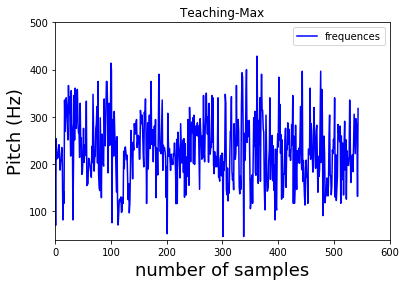

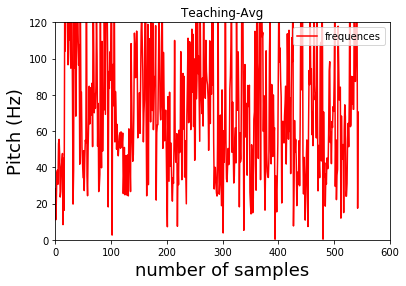

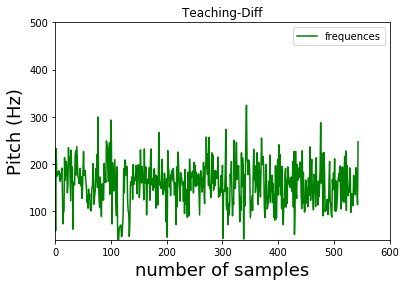

In [485]:
if __name__ == "__main__":
    App_Entry()
    #appRun()
    #wave_run()
    #yaapt_frequence_estimate()
    #RunApp_YAAPT()
    

In [ ]:
#use wave module : The total frame is 130779231
#_audio_len's length is 130779231

In [ ]:
#Frames:130779231, Sample_Rate:48000, Seconds:2724.5673125  (using wave module)